케라스률 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류 

-> 이진 분류 문제 : 타깃값은 0(부정)과 1(긍정)

-> 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야 함

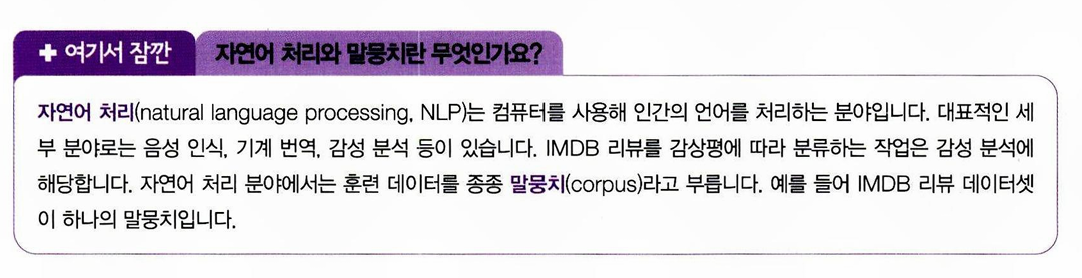

이미지는 정수 픽셀값으로 이루어져 있기 때문에 특별한 변환을 하지 않았지만 

텍스트 데이터는 데이터에 등장하는 단어마다 고유한 정수를 부여하여 컴퓨터가 처리가능한 숫자 데이터로 바꿔야 함

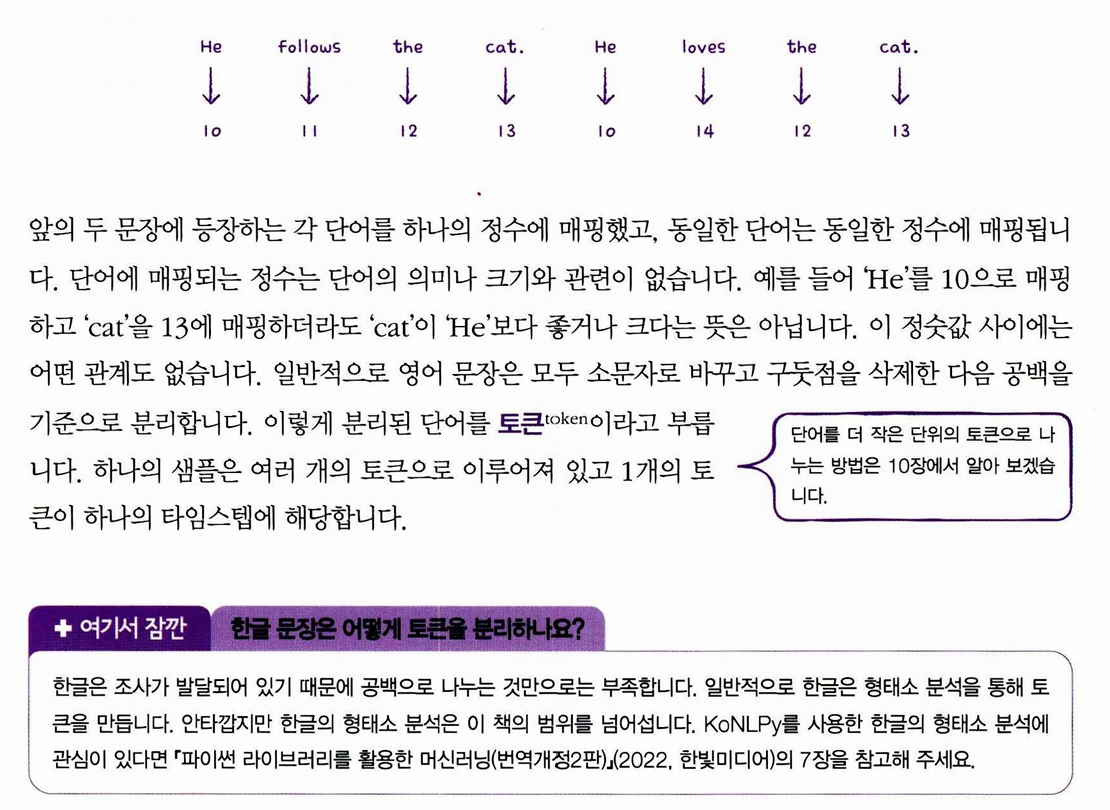

In [1]:
# 데이터 적재
# IMDB 리뷰 데이터셋 : 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋
# 실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 케라스에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있음
from keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200) # 가장 자주 등장하는 단어 200개만 사용
print(train_input.shape, test_input.shape) # 훈련 세트와 테스트 세트의 크기 확인

# 데이터셋이 1차원 배열인 이유?  IMDB 리뷰 텍스트는 길이가 제각각이기 때문에 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용 가능

2025-12-04 15:06:37.286877: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 15:06:37.543452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764828397.683956    1312 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764828397.736575    1312 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-04 15:06:38.045250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

(25000,) (25000,)


In [2]:
print(len(train_input[0])) # 첫 번째 리뷰의 길이
print(len(train_input[1])) # 두 번째 리뷰의 길이

218
189


In [3]:
# 첫번째 리뷰에 담긴 내용
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


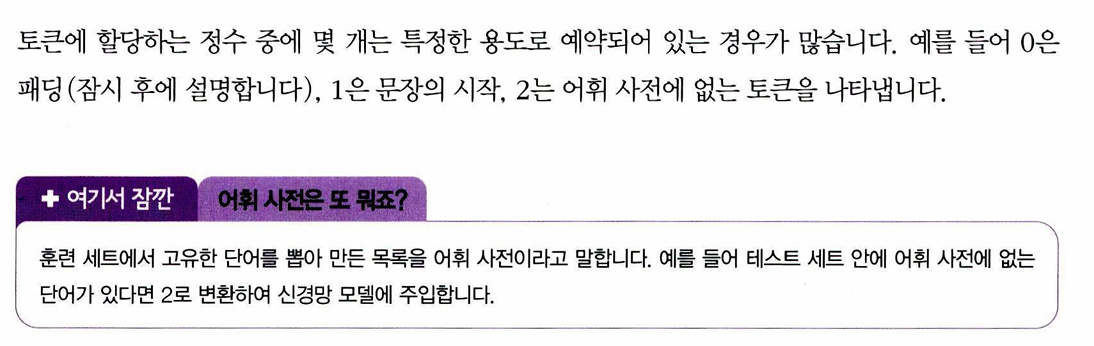

In [4]:
# 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [5]:
# 훈련 세트에서 검증 세트 분리
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [6]:
# 각 리뷰의 길이 계산
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [7]:
# 리뷰 길이의 평균과 중간값
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


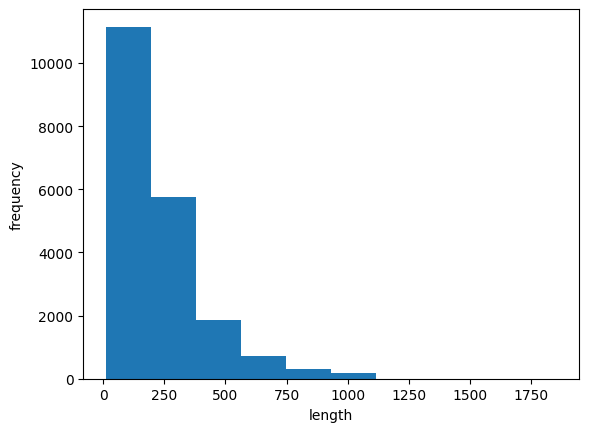

In [8]:
# lengths 배열을 히스토그램으로 표현
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [9]:
# 각 리뷰의 길이를 100으로 맞추기
from keras.preprocessing.sequence import pad_sequences
# maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩
train_seq = pad_sequences(train_input, maxlen=100) 

In [10]:
# train_seq의 크기
print(train_seq.shape)

(20000, 100)


In [11]:
# train_seq에 있는 첫 번째 샘플
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [12]:
# train_input에 있는 원본 샘플의 끝 확인 - 샘플의 앞이 잘렸는지 뒤가 잘렸는지 확인
print(train_input[0][-10:])
# train_seq[0]의 출력값과 비교하면 정확히 일치 - 샘플의 앞부분이 잘렸다는 것을 짐작 가능
# ->  pad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자름, 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문
# 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences()함수의 truncating 매개변수의 값을 기본값 ‘pre’가 아닌 ‘post’로 바꾸기

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [13]:
# train_seq에 있는 여섯 번째 샘플 출력
print(train_seq[5])
# 앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안 됨
# 길이가 짧으면 앞부분을 0으로 패딩

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [14]:
# 검증 세트의 길이도 100으로 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

#### 순환 신경망 생성 및 훈련

##### 방법1) 입력 데이터를 원-핫 인코딩으로 변환하여 순환층에 직접 주입

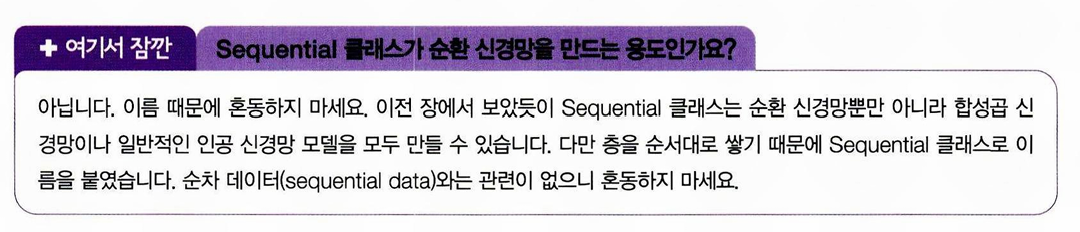

In [15]:
import keras
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200))) # 샘플 길이 100
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

I0000 00:00:1764828410.426796    1312 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


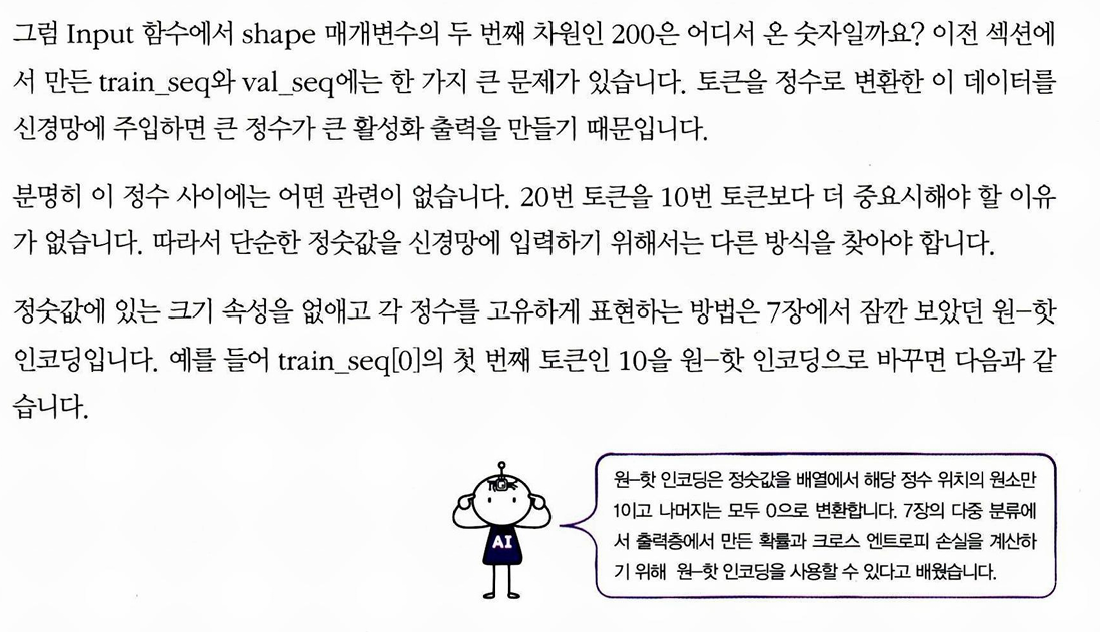

원-핫 인코딩은 어떤 클래스에 해당하는 원소만 1 이고 나머지는 모두 0인 벡터. 

정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘 사전 크기의 벡터가 생성됨.

In [16]:
# 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열 반환
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
# 배열의 크기 출력
print(train_oh.shape)

(20000, 100, 200)


In [18]:
# train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 출력
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [19]:
# 모든 원소의 값을 더해서 1이 되는지 확인
print(np.sum(train_oh[0][0]))
# 열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 됨

1.0


In [20]:
# val_seq도 원-핫 인코딩 변환
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
# 모델의 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 완전 연결 신경망이나 합성곱 신경망과 모델을 컴파일하고 훈련하는 전체 구조가 동일
# Adam 옵티마이저를 사용하고 이진 분류 문제이므로 손실 함수로 ‘binary_crossentropy’를 사용
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


I0000 00:00:1764828422.636264    1574 service.cc:148] XLA service 0x78948c0d7610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764828422.638551    1574 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-12-04 15:07:02.704899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764828423.006428    1574 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1764828423.625271    1574 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5046 - loss: 0.7004

2025-12-04 15:07:25.467126: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 381.47MiB (rounded to 400000000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-12-04 15:07:25.467205: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2025-12-04 15:07:25.467222: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 315, Chunks in use: 315. 78.8KiB allocated for chunks. 78.8KiB in use in bin. 2.2KiB client-requested in use in bin.
2025-12-04 15:07:25.467230: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-12-04 15:07

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# 훈련 손실과 검증 손실을 그래프로 그려서 훈련 과정 살펴보기
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [23]:
# 배열 크기 확인
print(train_seq.nbytes, train_oh.nbytes)
# 원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것. 순환 신경망에 사용하는 더 좋은 단어 표현 방법은?!! 단어 임베딩 사용!

8000000 3200000000


##### 방법 2) 단어 임베딩 사용
정수 시퀀스를 그대로 사용하기 위해 모델 처음에 Embedding 층을 추가


단어 임베딩은 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환. 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘

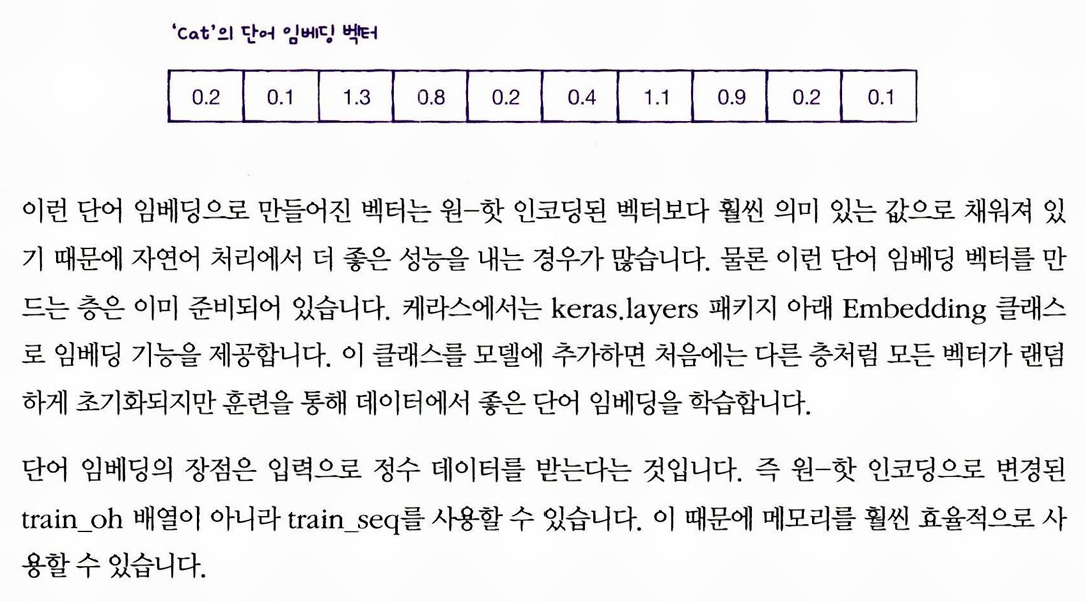

In [24]:
# 많이 등장하는 500개의 단어까지 선택해서 IMDB 데이터셋을 준비
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [25]:
# Embedding 클래스를 SimpleRNN층 앞에 추가한 두 번째 순환 신경망 생성
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,))) #  train_seq를 그대로 사용하므로 Input 함수에 지정할 입력의 크기는 (100,)
model_emb.add(keras.layers.Embedding(500, 16)) # 어휘 사전 크기, 임베딩 벡터 크기
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
# 모델의 구조 출력
model_emb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 모델 훈련
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.5530 - loss: 0.6808 - val_accuracy: 0.6282 - val_loss: 0.6380
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6952 - loss: 0.5902 - val_accuracy: 0.7470 - val_loss: 0.5447
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7359 - loss: 0.5470 - val_accuracy: 0.7188 - val_loss: 0.5597
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7379 - loss: 0.5350 - val_accuracy: 0.7576 - val_loss: 0.5195
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7564 - loss: 0.5206 - val_accuracy: 0.7598 - val_loss: 0.5174
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7850 - loss: 0.4737 - val_accuracy: 0.7738 - val_loss: 0.4938
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8035 - loss: 0.4487 - val_accuracy: 0.7656 - val_loss: 0.5010
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8102 - loss: 0.4337 -

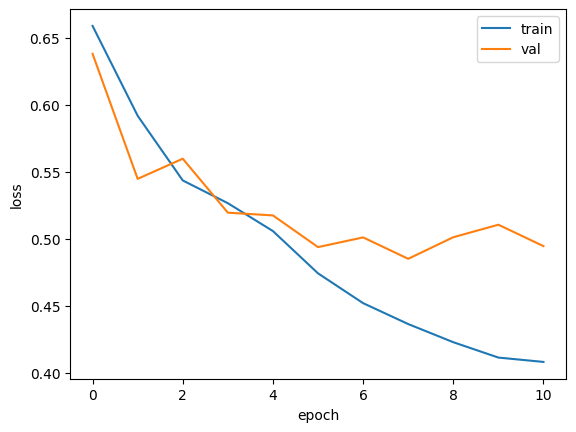

In [28]:
# 훈련 손실과 검증 손실을 그래프로 출력
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()